In [131]:
# importing pandas and opening the exxcel file. 
# The sheet_name argument is used to select particular sheets in the file.
import pandas as pd
#reading the file
df = pd.read_excel(r"C:\Users\USER\Desktop\work\shark.xlsx",sheet_name = "Shark Tank US dataset")
# creating the dataframe called Sharkt.
Sharkt = pd.DataFrame(df)


In [ ]:
# Getting basic info on the columns, I dod this to see what columns exist and if they are in the right data type.
Sharkt.info()

In [132]:
# to get a view of the first few rows of the dataframe
Sharkt.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Pitchers City,...,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,Atlanta,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,Somerset,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,Cary,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,Tampa,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,St. Paul,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Now we check for missing values
print(Sharkt.isna().sum())
# the pitchers city, pitchers state, Guest name and pitchers average age columns have more than half thier values missing
# and are independent so they can't be deduced.
Sharkt = Sharkt.drop(['Pitchers City','Pitchers State','Pitchers Average Age','Guest Name'], axis = 1)



In [ ]:
# Changing values in got deal column from 0 and 1
Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(0,"NO")

Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(1,"YES")



In [136]:
# In the dataset when a company has no website it is left blank so we fill blanks with no website
Sharkt["Company Website"] = Sharkt["Company Website"].fillna("No website")




In [137]:
# In the dataset when a company was not invested in it is left blank so we fill blanks with did not invest
Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]] = Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]].fillna("Did not invest")
Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]] = Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]].fillna("Did not Invest")




In [138]:
# Changing values from 0 to 1 with 1 meaning its a royalty deal and 0 meaniing advisory deal
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].replace(1,"Royalty deal")
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].fillna("Advisory deal")



In [139]:
# If no loan was taken it is left empty

Sharkt["Loan"] = Sharkt["Loan"].fillna("No loan")





In [140]:
# Changing the values for presence of sharks from 0 and 1 to present and not
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].fillna("unknown")

Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(0,"Not present")
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(1,"Present")


In [141]:
from IPython.display import display
display(Sharkt)


,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,14,2022-09-23,2023-05-19,21,1270,2023-05-05,NoshiFood,Food and Beverage,Male,noshiforkids.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,Present,unknown,unknown,unknown,unknown
1263,14,2022-09-23,2023-05-19,22,1271,2023-05-19,Tucky,Fashion/Beauty,Female,shoptucky.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,Present,unknown
1264,14,2022-09-23,2023-05-19,22,1272,2023-05-19,InfluencersInTheWild,Lifestyle/Home,Male,influencersinthewild.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,unknown,unknown
1265,14,2022-09-23,2023-05-19,22,1273,2023-05-19,Eyewris,Lifestyle/Home,Male,eyewris.com,...,25000.0,4.0,Did not Invest,Did not Invest,Present,Present,Present,unknown,Present,Present


In [142]:
Sharkt['Episode Name'] = 's' + Sharkt['Season Number'].astype(str) + 'ep' + Sharkt['Episode Number'].astype(str)
print(Sharkt['Episode Name'])

0         s1ep1
1         s1ep1
2         s1ep1
3         s1ep1
4         s1ep1
         ...   
1262    s14ep21
1263    s14ep22
1264    s14ep22
1265    s14ep22
1266    s14ep22
Name: Episode Name, Length: 1267, dtype: object


In [143]:
import numpy as np
import matplotlib.pyplot as plt
# Answering the questions
# Average no of episodes per season.
print(Sharkt.groupby('Season Number')["Episode Name"].nunique().mean())

22.642857142857142


In [144]:
Sharkt['Release month'] = Sharkt["Original Air Date"].dt.strftime('%b')

In [ ]:
print(Sharkt['Release month'])

In [145]:
# How many episodes per season
import matplotlib.pyplot as plt

In [ ]:
unique_episodes_per_season = Sharkt.groupby('Season Number')['Episode Name'].nunique()
print(unique_episodes_per_season)
ep_per_season_labels = list(unique_episodes_per_season)

Text(0, 0.5, 'No of episodes')

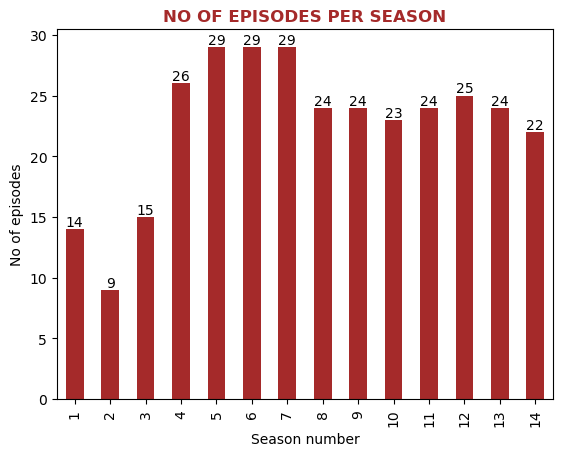

In [147]:
unique_episodes_per_season.plot(kind = 'bar',color='brown')
for season, label in enumerate(ep_per_season_labels):
    plt.text(season, ep_per_season_labels[season], label, ha='center', va = "bottom")
plt.title("NO OF EPISODES PER SEASON",fontweight='bold',color='brown')
plt.xlabel('Season number')
plt.ylabel('No of episodes')

In [ ]:
# next we find the episode with thee most views

In [148]:
max_views = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['US Viewership']
max_views_episode = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['Episode Name']
print('The episode with the most views is: ' + max_views_episode.upper() + ' with ' + str(max_views) + ' million views')

The episode with the most views is: S6EP15 with 8.64 million views


In [ ]:
# next we find the season with the most views

In [150]:
# creates a dataframe with only unique episode values and the corresponding views.
Sharkt_unique_episodes = Sharkt.drop_duplicates(subset = "Episode Name")
max_seasonal_views = Sharkt_unique_episodes.groupby('Season Number')['US Viewership'].sum()
print(max_seasonal_views.loc[max_seasonal_views== max_seasonal_views.max()])

Season Number
6    216.74
Name: US Viewership, dtype: float64


In [ ]:
# Line chart monitoring number of views by year

In [ ]:
Sharkt['Release year'] = Sharkt['Original Air Date'].dt.strftime('%Y')

In [ ]:
print(Sharkt['Release year'])

In [ ]:
unique_sharkt = Sharkt.drop_duplicates(subset = 'Episode Name')

In [ ]:
print(unique_sharkt)

In [ ]:
Views_by_time = unique_sharkt.groupby('Release year')['US Viewership'].sum()
views_per_year_labels = list(Views_by_time) 
print(Views_by_time)

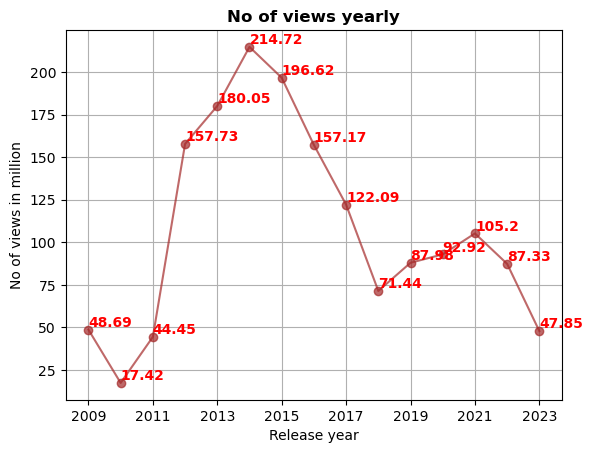

<Figure size 2000x1000 with 0 Axes>

In [151]:
Views_by_time.plot(kind = 'line', color ='brown',marker ='o',alpha = 0.7)
 
plt.ylabel("No of views in million")
plt.title("No of views yearly",fontweight='bold')
plt.grid(True)
for i, labelz in enumerate(views_per_year_labels):
    x = i  # Use the index for x-coordinate
    y = Views_by_time[i]   # Use the 'Y' column for y-coordinate
    plt.text(x, y, labelz, ha='left', va='bottom',color='red',fontweight='bold')
plt.figure(figsize=(20, 10))
plt.show()

In [155]:
#pitcher gender distribution
gender_split = Sharkt.groupby('Pitchers Gender')['Pitchers Gender'].count()
gender_split_labels = list(gender_split)

<Figure size 800x600 with 0 Axes>

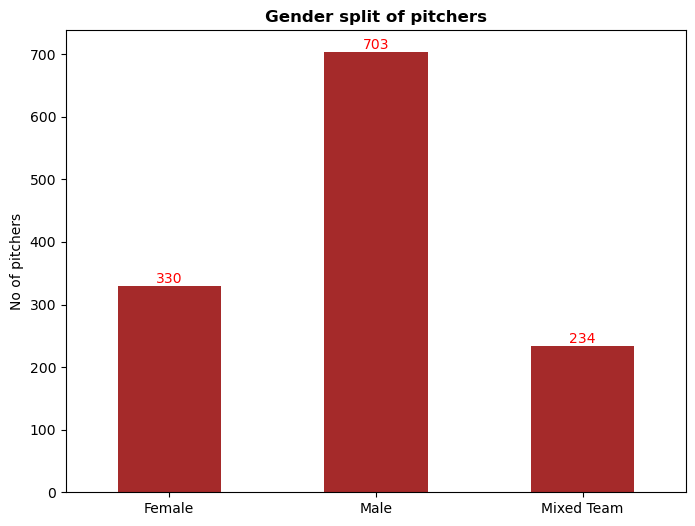

<Figure size 800x600 with 0 Axes>

In [156]:
#job industry distribution
plt.figure(figsize=(8, 6))
gend = gender_split.plot(kind='bar',color='brown')
plt.title("Gender split of pitchers",fontweight='bold')
plt.ylabel("No of pitchers")
for i,v in enumerate(gender_split):
    plt.text(i,v,str(v),ha='center',va='bottom',color='red')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.figure(figsize = (8,6))

In [157]:
#Industry with the highest presence of male and female pitchers each and industry with the lowest
gender_industry_prefference = Sharkt[['Pitchers Gender','Industry']].groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].max()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].min()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].max()]['Male'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].min()]['Male'])

Industry
Fashion/Beauty    86
Name: Female, dtype: int64
Industry
Automotive        0
Electronics       0
Liquor/Alcohol    0
Name: Female, dtype: int64
Industry
Food and Beverage    139
Name: Male, dtype: int64
Industry
Liquor/Alcohol     8
Uncertain/Other    8
Name: Male, dtype: int64


In [ ]:
# TOP 5 JOB INDUSTRY
top_5_industries = Sharkt["Industry"].value_counts().nlargest(5)

In [ ]:
print(top_5_industries)

(-1.101061654256188,
 1.1010333164629922,
 -1.1015376188334232,
 1.1104677059480466)

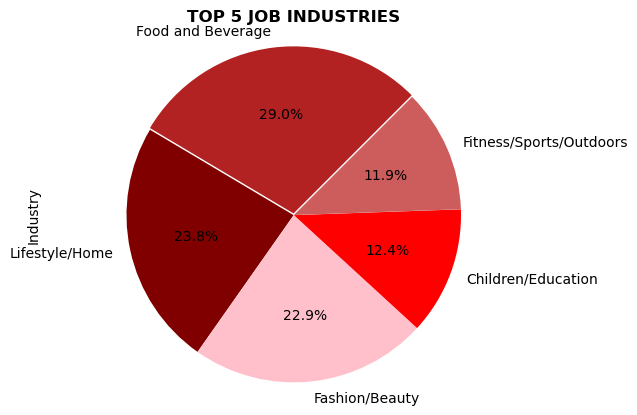

In [158]:
colors = ["firebrick","maroon","pink","red","indianred"]
explode = [0.01,0.001,0.001,0.001,0.001]
labels = ["Food and Beverage","Lifestyle/Home","Fashion/Beauty","Children/Education","Fitness/Sports/Outdoors"]
pie = top_5_industries.plot(kind='pie',colors=colors,autopct = "%1.1f%%",startangle=45,explode=explode,legend=False,labels=labels)
pie.legend().set_visible(False)
plt.title("TOP 5 JOB INDUSTRIES",fontweight='bold')
plt.axis('equal')

In [ ]:
top_5_industries_list = dict(top_5_industries)
print(top_5_industries_list)
gender_industry_split = Sharkt[Sharkt['Industry'].isin(top_5_industries_list)][['Pitchers Gender','Industry']]

In [ ]:
a = gender_industry_split.groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)
print(a)

Text(0, 0.5, 'Number of entreprenuers')

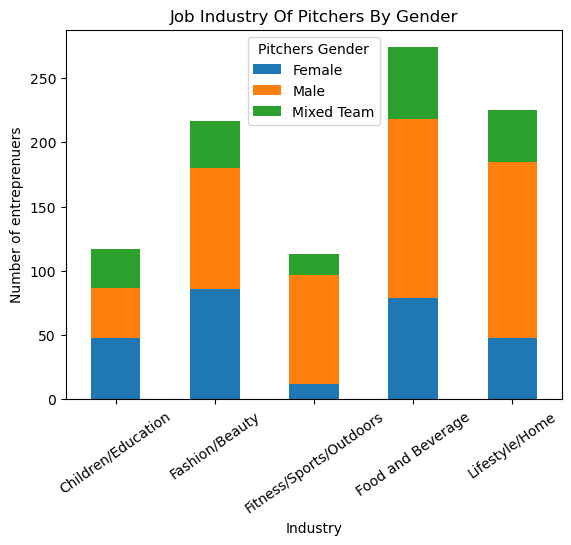

In [159]:
a.plot(kind='bar',stacked=True)
plt.title("Job Industry Of Pitchers By Gender")
plt.xticks(rotation=35)
plt.ylabel("Number of entreprenuers")


In [ ]:
Shark_deal_amount = Sharkt[Sharkt['Total Deal Amount'] != 'Did not invest']
display(Shark_deal_amount)

In [160]:
print("Average total deal amount " + str(Shark_deal_amount['Total Deal Amount'].mean()),"Average total deal equity " + str(Shark_deal_amount['Total Deal Equity'].mean())+ '%',"Average deal valuation " + str(Shark_deal_amount['Deal Valuation'].mean()),sep='\n')

Average total deal amount 295971.2710526316
Average total deal equity 24.29892105263156%
Average deal valuation 2179784.3710526316


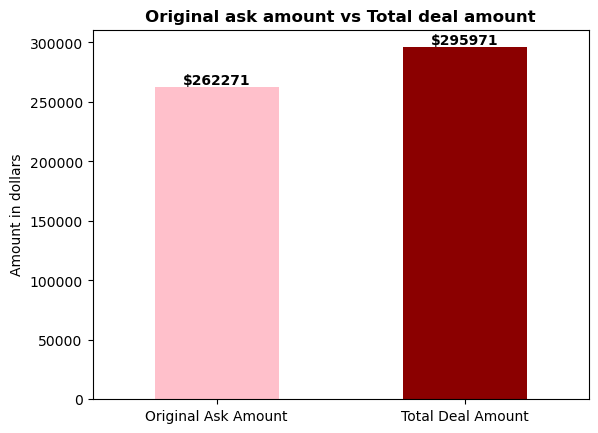

In [163]:
#Difference between offers made and given
Shark_deal_amount[['Original Ask Amount','Total Deal Amount']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.title('Original ask amount vs Total deal amount',fontweight='bold')
plt.ylabel("Amount in dollars")
for i,v in enumerate(Shark_deal_amount[['Original Ask Amount','Total Deal Amount']].mean()):
    plt.text(i,v,'$' + str(int(v)),fontweight='bold',ha='center',va='bottom')


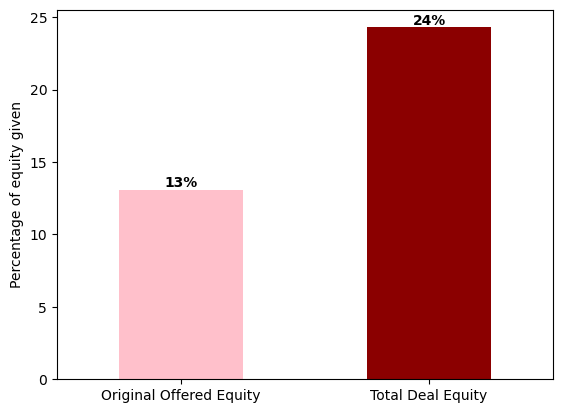

In [164]:
Shark_deal_amount[['Original Offered Equity','Total Deal Equity']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.ylabel("Percentage of equity given")
for i,v in enumerate(Shark_deal_amount[['Original Offered Equity','Total Deal Equity']].mean()):
    plt.text(i,v,str(int(v)) + '%',fontweight='bold',ha='center',va='bottom')

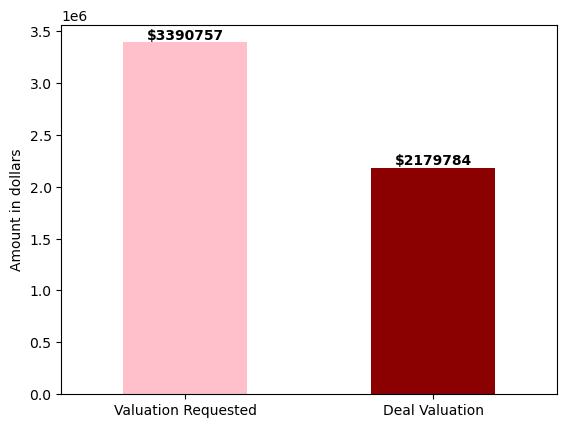

In [165]:
Shark_deal_amount[['Valuation Requested','Deal Valuation']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.ylabel("Amount in dollars")
for i,v in enumerate(Shark_deal_amount[['Valuation Requested','Deal Valuation']].mean()):
    plt.text(i,v,'$' + str(int(v)),fontweight='bold',ha='center',va='bottom')

<Axes: >

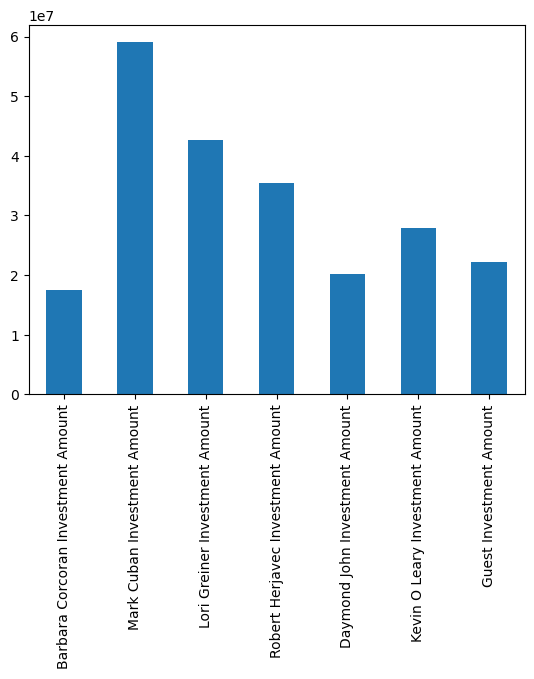

In [166]:
b = Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']][Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']] != "Did not Invest"]
b.sum().plot(kind='bar')

<Axes: >

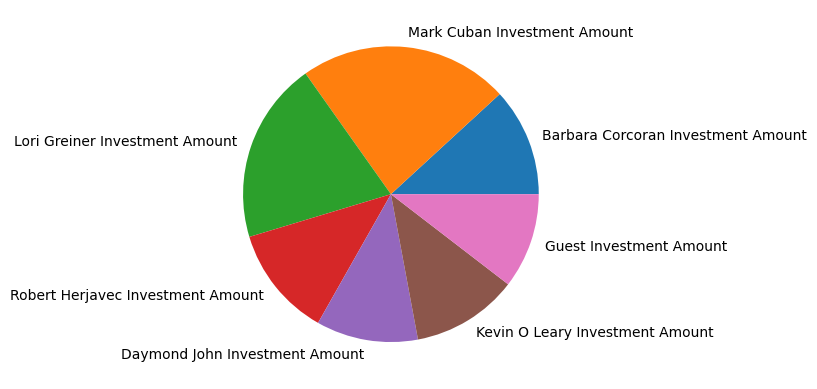

In [167]:
b.count().plot(kind='pie')